In [49]:
import scanpy as sc

In [2]:
import numpy
import random
adata = sc.read("tica.h5ad")

In [3]:
def get_ranks(embed):
    pairs = dict()
    for x in tqdm.tqdm(embed.embeddings):
        for y in embed.embeddings:
            if x==y: continue
            vec1 = embed.embeddings[x]
            vec2 = embed.embeddings[y]
            dist = 1. - distance.cosine(vec1, vec2)
            pairs[(x,y)] = dist
    import operator
    ranks = sorted(pairs.items(), key=operator.itemgetter(1))
    return [x[0] for x in list(reversed(ranks))]

In [4]:
from scipy.spatial import distance
import numpy
def get_df(embed, norm, subset, num):
    xs = []
    ys = []
    raws = []
    normt = [] 
    sources = []
    ranks = get_ranks(embed)
    rankd = dict(zip(ranks,range(1,len(ranks))))
    pairs = [tuple(x[:2]) for x in subset]
    vpairs = set(pairs).intersection(set(ranks))
    for x,y,source in tqdm.tqdm(subset):
        if (x,y) in rankd:
            raws.append(rankd[(x,y)])
            xs.append(x)
            ys.append(y)
            normt.append(norm)
            sources.append(source)
    import pandas
    df = pandas.DataFrame.from_dict({"Gene1":xs,"Gene2":ys,"distance".format(norm):raws,"Norm":normt,"Source":sources})
    df["embed_num"] = num
    return df

In [50]:
import celltypist
from celltypist import models
# models.download_models(model = 'Healthy_COVID19_PBMC.pkl')
# model = models.Model.load(model = "Healthy_COVID19_PBMC.pkl")
models.download_models()

📂 Storing models in /Users/ceglian/.celltypist/data/models
💾 Downloading model [1/18]: Immune_All_Low.pkl
💾 Downloading model [2/18]: Immune_All_High.pkl
💾 Downloading model [3/18]: Adult_Mouse_Gut.pkl
💾 Downloading model [4/18]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [5/18]: COVID19_Immune_Landscape.pkl
💾 Downloading model [6/18]: Cells_Fetal_Lung.pkl
💾 Downloading model [7/18]: Cells_Intestinal_Tract.pkl
💾 Downloading model [8/18]: Cells_Lung_Airway.pkl
💾 Downloading model [9/18]: Developing_Human_Brain.pkl
💾 Downloading model [10/18]: Developing_Human_Thymus.pkl
💾 Downloading model [11/18]: Developing_Mouse_Brain.pkl
⏩ Skipping [12/18]: Healthy_COVID19_PBMC.pkl (file exists)
💾 Downloading model [13/18]: Human_IPF_Lung.pkl
💾 Downloading model [14/18]: Human_Lung_Atlas.pkl
💾 Downloading model [15/18]: Human_PF_Lung.pkl
💾 Downloading model [16/18]: Lethal_COVID19_Lung.pkl
💾 Downloading model [17/18]: Nuclei_Lung_Airway.pkl
💾 Downloading model [18/18]: Pan_Fetal_Human.pkl


In [70]:
import glob
import os
ms = glob.glob(os.path.join(models.models_path,"*pkl"))
model_stack = []
allcts = []
for m in ms:
    m = m.split("/")[-1]
    if "mouse" not in m.lower():
        model = models.Model.load(model = m)
        model_stack.append(model)
        allcts += list(model.cell_types)
allcts = list(set(allcts))

tcell_types = []
bcell_types = []
mono_types = []
for ct in allcts:
    if "T " in ct:
        tcell_types.append(ct)
for ct in allcts:
    if "B " in ct:
        bcell_types.append(ct)
for ct in allcts:
    if "Mono" in ct:
        mono_types.append(ct)

In [120]:
topx = 10
topy = 10

tcell_markers = []
bcell_markers = []
mono_markers = []
for model in model_stack:
    for ct in model.cell_types:
        if ct in tcell_types:
            tcell_markers.append(set(model.extract_top_markers(ct,topx)))
    for ct in model.cell_types:
        if ct in bcell_types:
            genes = model.extract_top_markers(ct,topx)
#             if "OR2A25" in genes:
#                 print("hit",model.description)
#             else:
#                 print("miss")
            bcell_markers.append(set(model.extract_top_markers(ct,topx)))
    for ct in model.cell_types:
        if ct in mono_types:
            mono_markers.append(set(model.extract_top_markers(ct,topx)))

counts = []
for x in tcell_markers:
    counts += x
tmarkers = list(set(counts))
marker_counts = collections.defaultdict(int)
for tcell_marker in tmarkers:
    marker_counts[tcell_marker] += counts.count(tcell_marker)
import operator
sorted_t_markers = list(reversed(sorted(marker_counts.items(), key=operator.itemgetter(1))))
tmarkers = [x[0] for x in sorted_t_markers[:topy]]
tmarkers

counts = []
for x in mono_markers:
    counts += x
mmarkers = list(set(counts))
marker_counts = collections.defaultdict(int)
for mono_marker in mmarkers:
    marker_counts[mono_marker] += counts.count(mono_marker)
import operator
sorted_mono_markers = list(reversed(sorted(marker_counts.items(), key=operator.itemgetter(1))))
mmarkers = [x[0] for x in sorted_mono_markers[:topy]]
mmarkers

counts = []
for x in bcell_markers:
    counts += x
bmarkers = list(set(counts))
marker_counts = collections.defaultdict(int)
for bcell_marker in bmarkers:
    marker_counts[bcell_marker] += counts.count(bcell_marker)
import operator
sorted_b_markers = list(reversed(sorted(marker_counts.items(), key=operator.itemgetter(1))))
bmarkers = [x[0] for x in sorted_b_markers[:topy]]
bmarkers = set(bmarkers).difference(set(tmarkers).union(set(mmarkers)))
tmarkers = set(tmarkers).difference(set(mmarkers).union(set(mmarkers)))
mmarkers = set(mmarkers).difference(set(tmarkers).union(set(bmarkers)))
markers = dict()
print(bmarkers)
print(tmarkers)
print(mmarkers)
markers["B"] = bmarkers
markers["T"] = tmarkers
markers["M"] = markers

miss
miss
miss
miss
miss
miss
miss
miss
miss
miss
miss
miss
hit {'date': '2022-07-16 00:20:42.927778', 'details': 'immune sub-populations combined from 20 tissues of 18 studies', 'url': 'https://celltypist.cog.sanger.ac.uk/models/Pan_Immune_CellTypist/v2/Immune_All_Low.pkl', 'source': 'https://doi.org/10.1126/science.abl5197', 'version': 'v2', 'number_celltypes': 98}
miss
miss
miss
hit {'date': '2022-07-16 00:20:42.927778', 'details': 'immune sub-populations combined from 20 tissues of 18 studies', 'url': 'https://celltypist.cog.sanger.ac.uk/models/Pan_Immune_CellTypist/v2/Immune_All_Low.pkl', 'source': 'https://doi.org/10.1126/science.abl5197', 'version': 'v2', 'number_celltypes': 98}
hit {'date': '2022-07-16 00:20:42.927778', 'details': 'immune sub-populations combined from 20 tissues of 18 studies', 'url': 'https://celltypist.cog.sanger.ac.uk/models/Pan_Immune_CellTypist/v2/Immune_All_Low.pkl', 'source': 'https://doi.org/10.1126/science.abl5197', 'version': 'v2', 'number_celltypes':

In [112]:
pairs_exc = []
for ph, genes in markers.items():
    for ph2, genes2 in markers.items():
        if ph != ph2:
            for g1 in genes:
                for g2 in genes2:
                    pairs_exc.append((g1,g2))
pairs_ct = []
for ph, genes in markers.items():
    for g in genes:
        for g2 in genes:
            if g != g2:
                pairs_ct.append((g,g2))


In [114]:
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
dataset = GeneVectorDataset(adata)

Loading Expression.
Indexing expression.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2694738/2694738 [00:01<00:00, 1889259.60it/s]

Finished.


In [121]:
# import glob
# dfs = []
# multimapped = []
# for x in adata.var.index.tolist():
#     for y in adata.var.index.tolist():
#         if x == y: continue
#         if (x,y) in pairs_exc:
#             multimapped.append((x,y,"CellTypist Inter Cell Type"))
#         elif (x,y) in pairs_ct:
#             multimapped.append((x,y,"CellTypist Intra Cell Type"))
#         else:
#             multimapped.append((x,y,"Other"))

import tqdm
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding
for x in glob.glob("*full.vec"):
    norm = x.split("/")[-1].split("_")[0]
    num = x.split("/")[-1].split("_")[2]
    try:
        embed = GeneEmbedding(x, dataset, vector="average")
        dfs.append(get_df(embed,norm,multimapped,num))
    except Exception as e:
        print(e)
        continue

Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1265077.41it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1289751.45it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1390750.82it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1248381.75it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1352888.58it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1263325.91it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1395892.68it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1434649.72it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1369861.71it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1320904.45it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1373203.15it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1359925.85it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1348232.48it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1293218.99it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1342216.40it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1360940.44it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1310105.68it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1331588.55it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1420147.50it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1365486.84it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1450845.90it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1388496.75it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1454684.53it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1476266.62it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1366487.91it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1451809.06it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1458547.59it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1403359.84it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1465415.08it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1377256.82it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1467039.46it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1402930.37it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1472697.36it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1387025.95it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1392237.40it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1453090.91it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1408875.45it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1421394.75it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1366542.28it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1389016.42it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1458907.65it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1406221.95it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1450487.80it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1477847.92it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1454459.83it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1449502.82it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1410303.73it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1395305.60it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1424538.23it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1407140.93it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1396995.67it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1405980.83it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1451307.21it/s]


Loading average of 1st and 2nd weights.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999000/999000 [00:00<00:00, 1388483.41it/s]


Loading average of 1st and 2nd weights.


  3%|███▎                                                                                                                     | 27/1000 [00:00<00:11, 81.46it/s]


KeyboardInterrupt: 

In [122]:
import pandas
import seaborn as sns
df = pandas.concat(dfs)
df

,Gene1,Gene2,distance,Norm,Source,embed_num
0,TMEM176A,ICA1,512090,norm,Other,774836668
1,TMEM176A,CD38,811746,norm,Other,774836668
2,TMEM176A,PDK4,241986,norm,Other,774836668
3,TMEM176A,MATK,751958,norm,Other,774836668
4,TMEM176A,CD79B,715608,norm,Other,774836668
...,...,...,...,...,...,...
983066,IL8,IGLC1,424511,raw,Other,5891
983067,IL8,AL512428.1,164699,raw,Other,5891
983068,IL8,CCL3L1,5265,raw,Other,5891
983069,IL8,RNU6.514P,241653,raw,Other,5891


In [12]:
markers = dict()
markers["T Cell"] = ["CD3D","CD3G","CD3E","IL32","TRAC","CD2"]
markers["B/Plasma"] = ["CD79A","CD79B","MZB1","CD19","BANK1"]
markers["Myeloid"] = ["LYZ","CST3","AIF1","CD68","C1QA","C1QB","C1QC"]

In [13]:
markers = dict()
markers["T Cell"] = ["CD3D","CD3G","CD3E","IL32","TRAC","CD2"]
markers["B/Plasma"] = ["CD79A","CD79B","MZB1","CD19","BANK1"]
markers["Myeloid"] = ["LYZ","CST3","AIF1","CD68","C1QA","C1QB","C1QC"]
pairs_exc = []
for ph, genes in markers.items():
    for ph2, genes2 in markers.items():
        if ph != ph2:
            for g1 in genes:
                for g2 in genes2:
                    pairs_exc.append((g1,g2))
pairs_ct = []
for ph, genes in markers.items():
    for g in genes:
        for g2 in genes:
            if g != g2:
                pairs_ct.append((g,g2))

In [14]:
pairs_exc

[('CD3D', 'CD79A'),
 ('CD3D', 'CD79B'),
 ('CD3D', 'MZB1'),
 ('CD3D', 'CD19'),
 ('CD3D', 'BANK1'),
 ('CD3G', 'CD79A'),
 ('CD3G', 'CD79B'),
 ('CD3G', 'MZB1'),
 ('CD3G', 'CD19'),
 ('CD3G', 'BANK1'),
 ('CD3E', 'CD79A'),
 ('CD3E', 'CD79B'),
 ('CD3E', 'MZB1'),
 ('CD3E', 'CD19'),
 ('CD3E', 'BANK1'),
 ('IL32', 'CD79A'),
 ('IL32', 'CD79B'),
 ('IL32', 'MZB1'),
 ('IL32', 'CD19'),
 ('IL32', 'BANK1'),
 ('TRAC', 'CD79A'),
 ('TRAC', 'CD79B'),
 ('TRAC', 'MZB1'),
 ('TRAC', 'CD19'),
 ('TRAC', 'BANK1'),
 ('CD2', 'CD79A'),
 ('CD2', 'CD79B'),
 ('CD2', 'MZB1'),
 ('CD2', 'CD19'),
 ('CD2', 'BANK1'),
 ('CD3D', 'LYZ'),
 ('CD3D', 'CST3'),
 ('CD3D', 'AIF1'),
 ('CD3D', 'CD68'),
 ('CD3D', 'C1QA'),
 ('CD3D', 'C1QB'),
 ('CD3D', 'C1QC'),
 ('CD3G', 'LYZ'),
 ('CD3G', 'CST3'),
 ('CD3G', 'AIF1'),
 ('CD3G', 'CD68'),
 ('CD3G', 'C1QA'),
 ('CD3G', 'C1QB'),
 ('CD3G', 'C1QC'),
 ('CD3E', 'LYZ'),
 ('CD3E', 'CST3'),
 ('CD3E', 'AIF1'),
 ('CD3E', 'CD68'),
 ('CD3E', 'C1QA'),
 ('CD3E', 'C1QB'),
 ('CD3E', 'C1QC'),
 ('IL32', 'LYZ'),
 ('

In [15]:
df["pair"] = ["{}-{}".format(g1,g2) for g1,g2 in zip(df["Gene1"],df["Gene2"])]
df

,Gene1,Gene2,distance,Norm,Source,embed_num,pair
0,TMEM176A,ICA1,455770,log,Unannotated,76542,TMEM176A-ICA1
1,TMEM176A,CD38,477506,log,Unannotated,76542,TMEM176A-CD38
2,TMEM176A,PDK4,267844,log,MSigDB Cell Type,76542,TMEM176A-PDK4
3,TMEM176A,MATK,689862,log,MSigDB Cell Type,76542,TMEM176A-MATK
4,TMEM176A,CD79B,563792,log,Unannotated,76542,TMEM176A-CD79B
...,...,...,...,...,...,...,...
983066,IL8,IGLC1,314721,lognorm,Unannotated,30201,IL8-IGLC1
983067,IL8,AL512428.1,427989,lognorm,Unannotated,30201,IL8-AL512428.1
983068,IL8,CCL3L1,102369,lognorm,Unannotated,30201,IL8-CCL3L1
983069,IL8,RNU6.514P,679665,lognorm,Unannotated,30201,IL8-RNU6.514P


In [21]:
# pairs = ["{}-{}".format(p[0],p[1]) for p in pairs_exc]
# dfx = df[df["pair"].isin(pairs)]
dfx

,Gene1,Gene2,distance,Norm,Source,embed_num,pair
4960,CD79B,IL32,85554,log,MSigDB Cell Type,76542,CD79B-IL32
5010,CD79B,LYZ,693494,log,Unannotated,76542,CD79B-LYZ
5037,CD79B,CST3,95280,log,Unannotated,76542,CD79B-CST3
5111,CD79B,CD2,167804,log,MSigDB Cell Type,76542,CD79B-CD2
5173,CD79B,CD68,187656,log,Unannotated,76542,CD79B-CD68
...,...,...,...,...,...,...,...
657473,TRAC,MZB1,103509,lognorm,Unannotated,30201,TRAC-MZB1
657491,TRAC,C1QB,649973,lognorm,Unannotated,30201,TRAC-C1QB
657492,TRAC,C1QA,695847,lognorm,Unannotated,30201,TRAC-C1QA
657506,TRAC,CD19,233571,lognorm,Unannotated,30201,TRAC-CD19


In [38]:
#dfx = df.groupby(['Gene1', 'Gene2','Norm','Source']).agg({'distance': ['median']}).reset_index()
# rank = numpy.max(dfx["distance"]) - dfx["distance"]
# dfx["rank"] = rank
!pwd

/Users/ceglian/Analysis/acc_test


In [125]:
# cd8 = dfx[dfx["Gene1"] == "CD8A"]
# cd8 = cd8[cd8["Gene2"] == "CD8B"]
rank = numpy.max(df["distance"]) - df["distance"]
df["rank"] = rank
dfx = df[df["Source"]!="Other"]

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.7


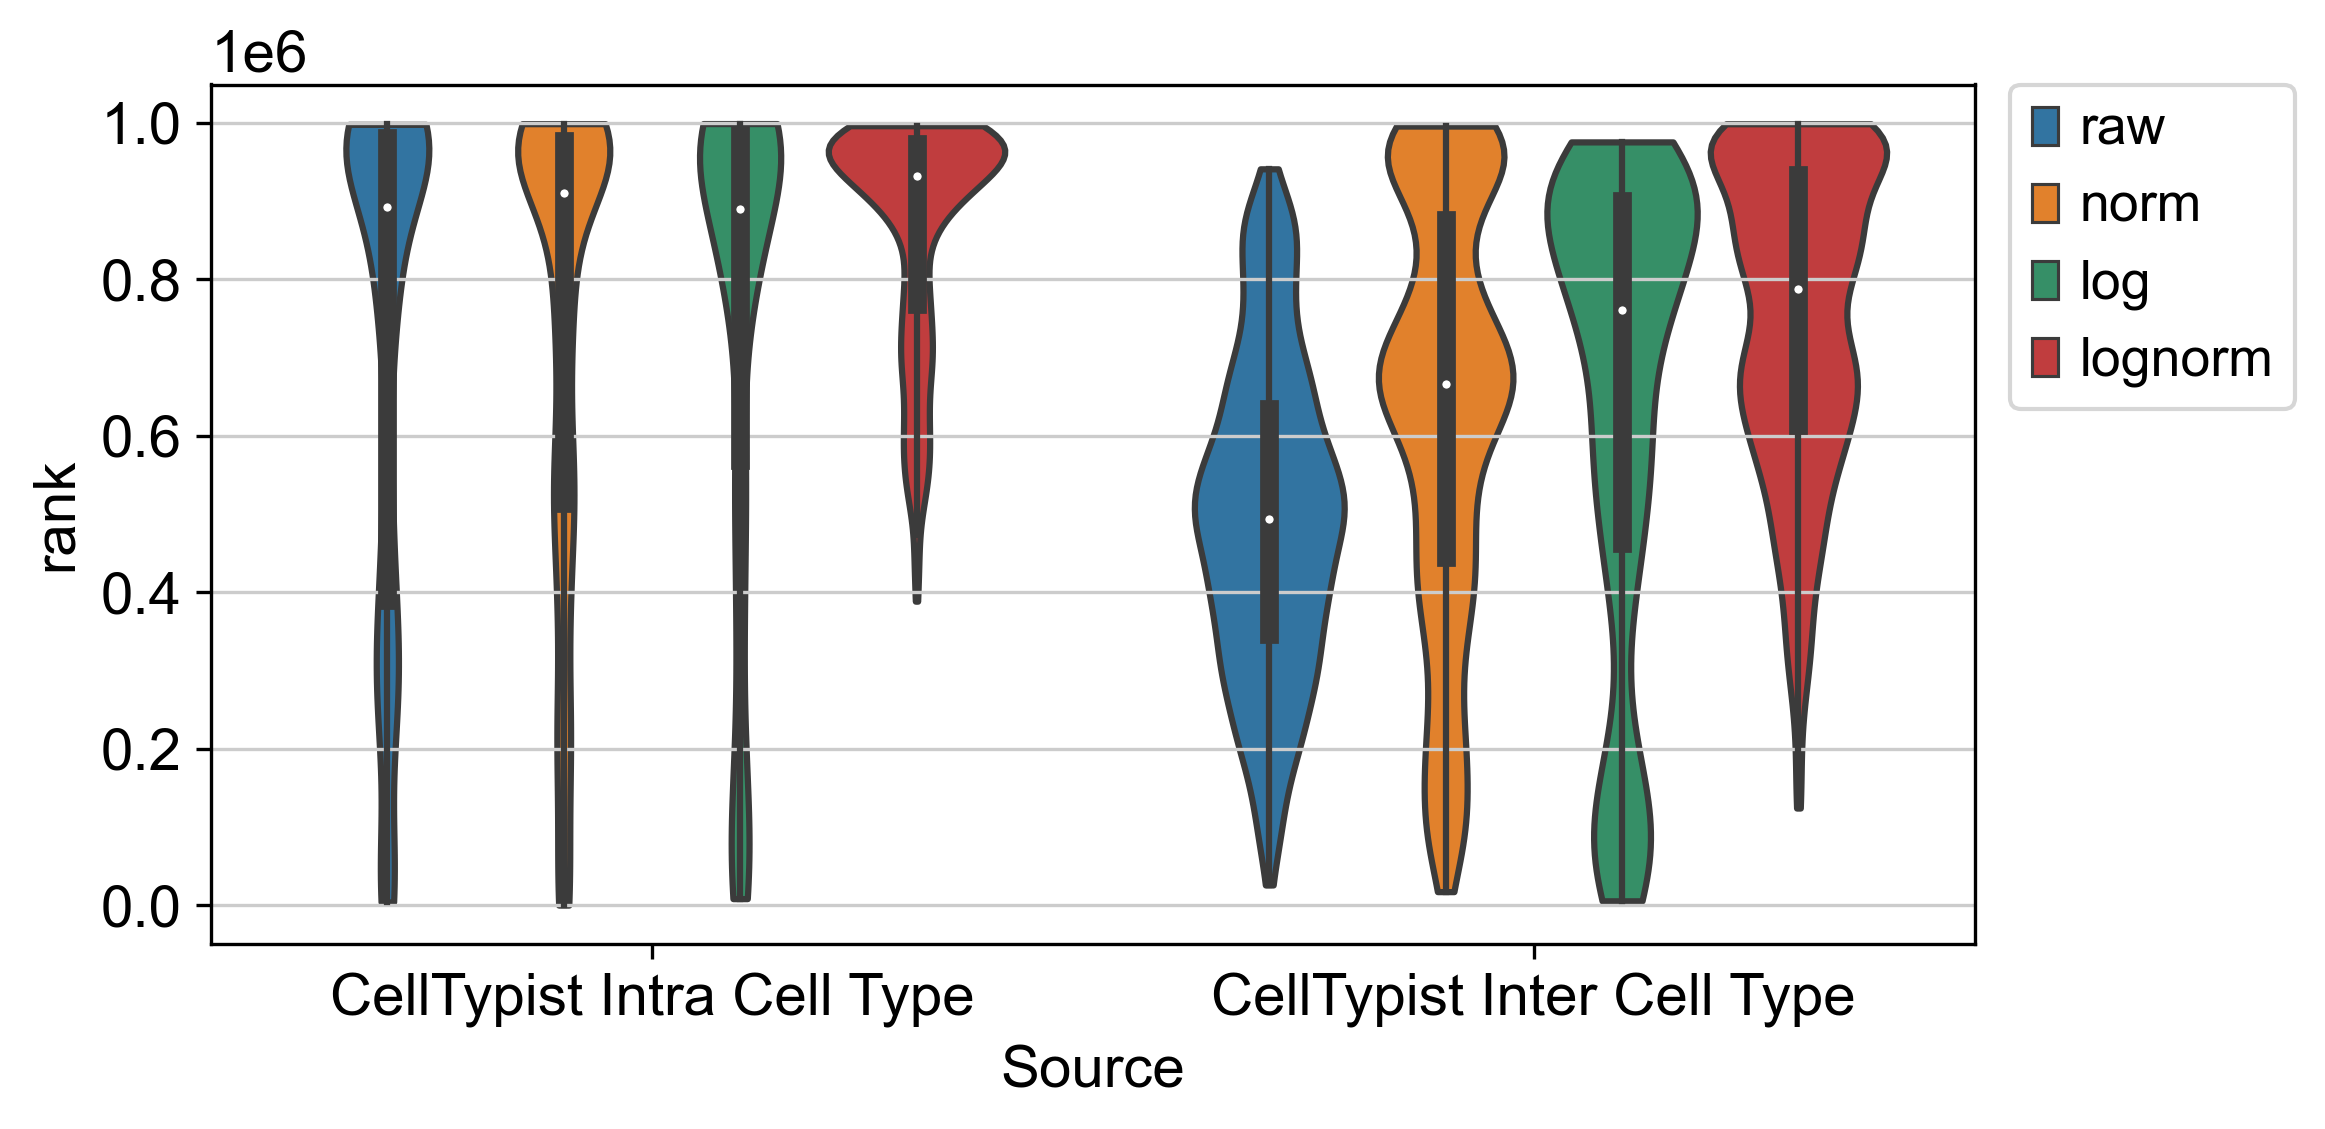

In [128]:
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150,facecolor='white')

# plt.figure(figsize=(6,4))
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.violinplot(data=dfx,ax=ax,x="Source",y="rank",hue="Norm",cut=0,
               hue_order=["raw","norm","log","lognorm"], order = ["CellTypist Intra Cell Type","CellTypist Inter Cell Type"])
# sns.swarmplot(data=dfx,ax=ax,x="Source",y="rank",hue="Norm",dodge=True,size=1.,
#               hue_order=["raw","norm","log","lognorm"])

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig("/Users/ceglian/full2.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.7


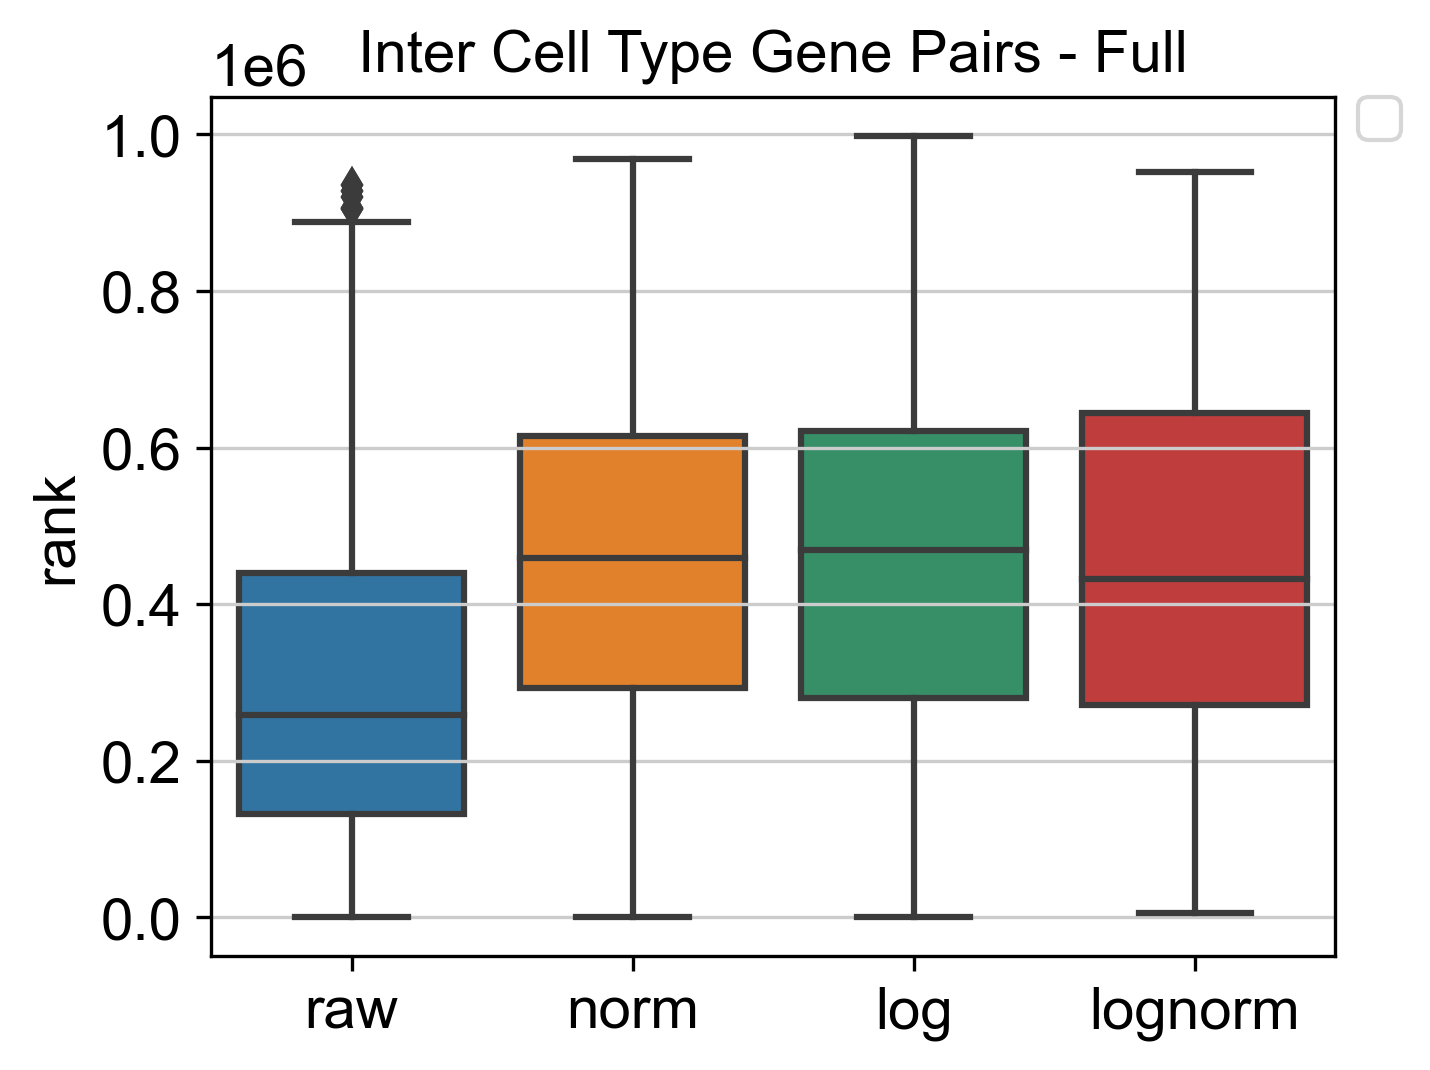

In [28]:
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150,facecolor='white')
dfx2 = dfx[dfx["Source"] == "Unannotated"]
plt.figure(figsize=(5,4))
sns.boxplot(data=dfx2,x="Norm",y="rank",order=["raw","norm","log","lognorm"])
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.xlabel("")
plt.title("Inter Cell Type Gene Pairs - Full")
plt.savefig("/Users/ceglian/full_exc.pdf")

In [29]:
pairs_ct = []
for ph, genes in markers.items():
    for g in genes:
        for g2 in genes:
            if g != g2:
                pairs_ct.append((g,g2))

In [30]:
pairs = ["{}-{}".format(p[0],p[1]) for p in pairs_ct]
dfx = df[df["pair"].isin(pairs)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.7


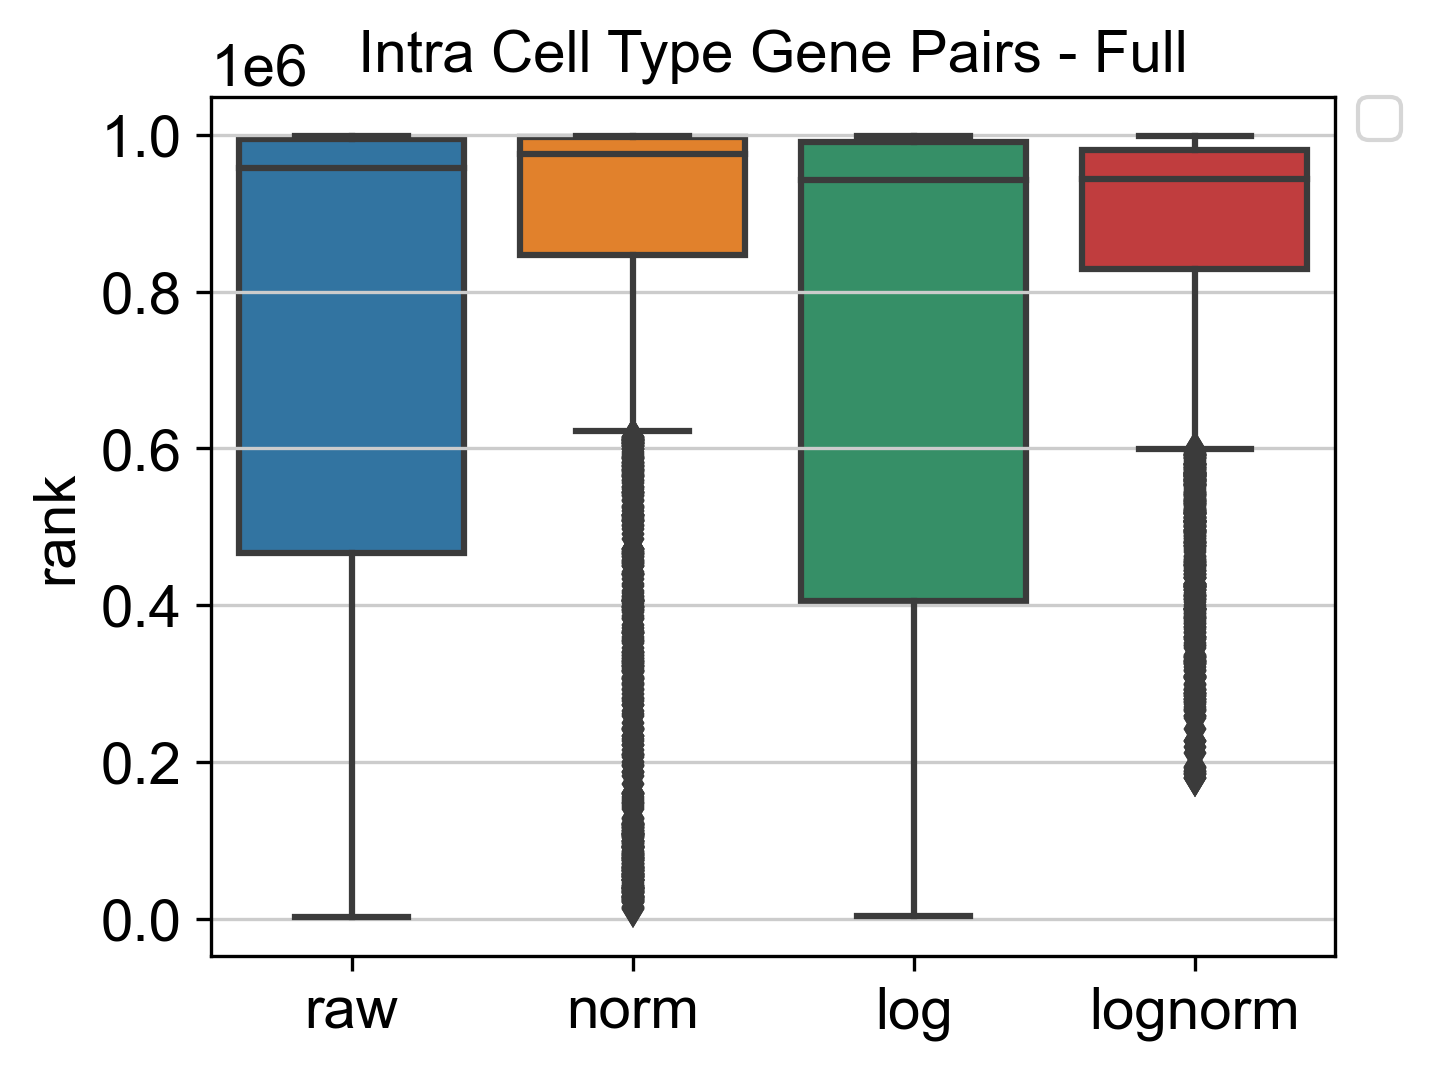

In [34]:
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150,facecolor='white')
# dfx2 = dfx[dfx["Source"] == "MSigDB Cell Type"]
plt.figure(figsize=(5,4))
sns.boxplot(data=dfx,x="Norm",y="rank",order=["raw","norm","log","lognorm"])
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.xlabel("")
plt.title("Intra Cell Type Gene Pairs - Full")
plt.savefig("/Users/ceglian/full_exc.pdf")

In [35]:
dfx

,Gene1,Gene2,distance,Norm,Source,embed_num,pair,rank
5052,CD79B,CD79A,92326,log,MSigDB Cell Type,76542,CD79B-CD79A,906673
5288,CD79B,BANK1,197026,log,MSigDB Cell Type,76542,CD79B-BANK1,801973
5395,CD79B,MZB1,103246,log,MSigDB Cell Type,76542,CD79B-MZB1,895753
5428,CD79B,CD19,221414,log,MSigDB Cell Type,76542,CD79B-CD19,777585
6102,IL32,CD2,418,log,MSigDB Cell Type,76542,IL32-CD2,998581
...,...,...,...,...,...,...,...,...
657038,TRAC,IL32,7441,lognorm,MSigDB Cell Type,30201,TRAC-IL32,991558
657189,TRAC,CD2,46923,lognorm,MSigDB Cell Type,30201,TRAC-CD2,952076
657393,TRAC,CD3G,2461,lognorm,MSigDB Cell Type,30201,TRAC-CD3G,996538
657444,TRAC,CD3D,17919,lognorm,MSigDB Cell Type,30201,TRAC-CD3D,981080
